<a href="https://colab.research.google.com/github/dafidsky18-ai/Education-Wealth/blob/main/mukhammad_dafid_capstones_ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello")

Hello


In [ ]:
# --- Tahap 1: Instalasi Library ---

print("Memulai instalasi library...")

# Opsi -q (quiet) digunakan agar output tidak terlalu panjang
!pip install pandas langchain_community replicate wordcloud matplotlib seaborn -q

print("\nInstalasi selesai.")


Memulai instalasi library...

Instalasi selesai.


In [ ]:
import pandas as pd
import re

# Nama file harus sama persis
file_path = 'glassdoor_reviews.csv'

print(f"Memuat dataset dari: {file_path}")
try:
    # Membaca file CSV ke dalam DataFrame
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")

    print("\nMembersihkan data...")
    # Menghapus baris jika kolom 'pros' atau 'cons' kosong
    df.dropna(subset=['pros', 'cons'], inplace=True)

    # Membuat fungsi untuk membersihkan teks
    def preprocess_text(text):
        if isinstance(text, str):
            text = text.lower() # Mengubah ke huruf kecil
            text = re.sub(r'[^a-z0-9\s]', '', text) # Menghapus karakter non-alfanumerik
            return text
        return "" # Mengembalikan string kosong jika bukan teks

    # Menerapkan fungsi pembersihan ke kolom yang relevan
    df['pros_cleaned'] = df['pros'].apply(preprocess_text)
    df['cons_cleaned'] = df['cons'].apply(preprocess_text)

    print("Pembersihan data selesai.")

    # Menampilkan informasi ringkas dan contoh hasil
    print("\nInformasi Dataset Setelah Dibersihkan:")
    df.info()

    print("\nContoh Hasil Pembersihan Teks:")
    print(df[['cons', 'cons_cleaned']].head())

    print("\nTAHAP 2 SELESAI.")

except FileNotFoundError:
    print(f"\n--- ERROR ---")
    print(f"File '{file_path}' tidak ditemukan di sesi Colab ini.")

Memuat dataset dari: glassdoor_reviews.csv
Dataset berhasil dimuat.

Membersihkan data...
Pembersihan data selesai.

Informasi Dataset Setelah Dibersihkan:
<class 'pandas.core.frame.DataFrame'>
Index: 47705 entries, 0 to 47706
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   firm                 47705 non-null  object 
 1   date_review          47705 non-null  object 
 2   job_title            47705 non-null  object 
 3   current              47705 non-null  object 
 4   location             31293 non-null  object 
 5   overall_rating       47705 non-null  int64  
 6   work_life_balance    40531 non-null  float64
 7   culture_values       37890 non-null  float64
 8   diversity_inclusion  6450 non-null   float64
 9   career_opp           40622 non-null  float64
 10  comp_benefits        40529 non-null  float64
 11  senior_mgmt          40207 non-null  float64
 12  recommend            47705 non-null

In [ ]:
import pandas as pd
import re

# Nama file harus sama persis
path = 'least-basic_education.csv'

# Create an empty DataFrame with appropriate column names
# Corrected variable name from least-basic_education.csv to least_basic_education_df
# least_basic_education_df = pd.DataFrame(columns=["Entity", "Year", "Share_no_formal_education", "Share_formal_education"])

# Assuming the CSV content is structured like an HTML table and you intended to parse it
# This part is highly dependent on the actual content of your least-basic_education.csv file.
# If it's a standard CSV, the pd.read_csv part at the beginning is sufficient.
# If it's not a standard CSV and contains HTML-like structure, you might need a library like BeautifulSoup.
# The following code is based on the assumption you are trying to parse HTML-like table data.

# This is placeholder code as I don't have access to the content of least-basic_education.csv
# to confirm if it contains HTML table structure.
# If your file is a standard CSV, you only need the pd.read_csv line.
try:
    # with open(path, 'r') as f:
    #     content = f.read()
        # Assuming 'content' now holds HTML-like table data
        # You would need to use a library like BeautifulSoup here
        # from bs4 import BeautifulSoup
        # soup = BeautifulSoup(content, 'html.parser')

        # Placeholder loop based on the original code's structure assumption
        # for row in soup.find("tbody").find_all("20"):
        #     col = row.find_all("20")
        #     entity = col[0].text
        #     year = col[1].text
        #     share_no_formal_education = col[2].text
        #     share_formal_education = col[3].text

        #     # Append data to the DataFrame
        #     least_basic_education_df = least_basic_education_df.append({
        #         "Entity": entity,
        #         "Year": year,
        #         "Share_no_formal_education": share_no_formal_education,
        #         "Share_formal_education": share_formal_education
        #     }, ignore_index=True)

    # If your file is a standard CSV, uncomment the line below and remove the parsing logic above
    least_basic_education_df = pd.read_csv(path)

    print("DataFrame created and populated (or loaded from CSV).")
    print(least_basic_education_df.head(26))

except FileNotFoundError:
    print(f"\n--- ERROR ---")
    print(f"File '{path}' not found.")
except Exception as e:
    print(f"\n--- ERROR ---")
    print(f"An error occurred during processing: {e}")


DataFrame created and populated (or loaded from CSV).
        Entity Code  Year  \
0      Albania  ALB  2015   
1      Albania  ALB  2020   
2      Algeria  DZA  2015   
3      Algeria  DZA  2020   
4    Argentina  ARG  2015   
5    Argentina  ARG  2020   
6      Armenia  ARM  2015   
7      Armenia  ARM  2020   
8        Aruba  ABW  2015   
9        Aruba  ABW  2020   
10   Australia  AUS  2015   
11   Australia  AUS  2020   
12     Austria  AUT  2015   
13     Austria  AUT  2020   
14  Azerbaijan  AZE  2015   
15  Azerbaijan  AZE  2020   
16     Bahamas  BHS  2015   
17     Bahamas  BHS  2020   
18     Bahrain  BHR  2015   
19     Bahrain  BHR  2020   
20  Bangladesh  BGD  2015   
21  Bangladesh  BGD  2020   
22     Belarus  BLR  2015   
23     Belarus  BLR  2020   
24     Belgium  BEL  2015   
25     Belgium  BEL  2020   

    Share of population with no formal education, 1820-2020  \
0                                                 2.0         
1                                   

In [ ]:

import io
import pandas as pd

least-basic_education.csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(least-basic_education.csv)
display(df.head(115))

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (ipython-input-984242672.py, line 4)

In [ ]:
# Nama file harus sama persis
file_path = 'least-basic_education.csv'


print(f"Memuat dataset dari: {file_path}")
try:
    # Membaca file CSV ke dalam DataFrame
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")
    display(df.head()) # Added to display the head of the dataframe
except FileNotFoundError:
    print(f"\n--- ERROR ---")
    print(f"File '{file_path}' tidak ditemukan di sesi Colab ini.")
except Exception as e:
    print(f"\n--- ERROR ---")
    print(f"An error occurred during processing: {e}")

Memuat dataset dari: least-basic_education.csv
Dataset berhasil dimuat.


,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.0,98.0
1,Albania,ALB,2020,1.0,99.0
2,Algeria,DZA,2015,16.0,84.0
3,Algeria,DZA,2020,13.0,87.0
4,Argentina,ARG,2015,2.0,98.0


In [ ]:
import pandas as pd
import re

# Nama file harus sama persis
path = 'least-basic_education.csv'

# Create an empty DataFrame with appropriate column names
least_basic_education_df = pd.DataFrame(columns=["Entity", "Year", "Share_no_formal_education", "Share_formal_education"])

# Assuming the CSV content is structured like an HTML table and you intended to parse it
# This part is highly dependent on the actual content of your least-basic_education.csv file.
# If it's a standard CSV, the pd.read_csv part at the beginning is sufficient.
# If it's not a standard CSV and contains HTML-like structure, you might need a library like BeautifulSoup.
# The following code is based on the assumption you are trying to parse HTML-like table data.

# This is placeholder code as I don't have access to the content of least-basic_education.csv
# to confirm if it contains HTML table structure.
# If your file is a standard CSV, you only need the pd.read_csv line.
try:
    with open(path, 'r') as f:
        content = f.read()
        # Assuming 'content' now holds HTML-like table data
        # You would need to use a library like BeautifulSoup here
        # from bs4 import BeautifulSoup
        # soup = BeautifulSoup(content, 'html.parser')

        # Placeholder loop based on the original code's structure assumption
        # for row in soup.find("tbody").find_all("20"):
        #     col = row.find_all("20")
        #     entity = col[0].text
        #     year = col[1].text
        #     share_no_formal_education = col[2].text
        #     share_formal_education = col[3].text

        #     # Append data to the DataFrame
        #     least_basic_education_df = least_basic_education_df.append({
        #         "Entity": entity,
        #         "Year": year,
        #         "Share_no_formal_education": share_no_formal_education,
        #         "Share_formal_education": share_formal_education
        #     }, ignore_index=True)

    # If your file is a standard CSV, uncomment the line below and remove the parsing logic above
    # least_basic_education_df = pd.read_csv(path)

    print("DataFrame created and populated (or loaded from CSV).")
    print(least_basic_education_df.head())

except FileNotFoundError:
    print(f"\n--- ERROR ---")
    print(f"File '{path}' not found.")
except Exception as e:
    print(f"\n--- ERROR ---")
    print(f"An error occurred during processing: {e}")

DataFrame created and populated (or loaded from CSV).
Empty DataFrame
Columns: [Entity, Year, Share_no_formal_education, Share_formal_education]
Index: []


In [ ]:
display(least_basic_education_df.head(50))

,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.0,98.0
1,Albania,ALB,2020,1.0,99.0
2,Algeria,DZA,2015,16.0,84.0
3,Algeria,DZA,2020,13.0,87.0
4,Argentina,ARG,2015,2.0,98.0
5,Argentina,ARG,2020,2.0,98.0
6,Armenia,ARM,2015,1.0,99.0
7,Armenia,ARM,2020,0.0,100.0
8,Aruba,ABW,2015,6.0,94.0
9,Aruba,ABW,2020,5.0,95.0


In [ ]:
display(least_basic_education_df.describe())

,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
count,468.000000,468.000000,468.000000
mean,1994.775641,22.095108,77.904892
std,42.960602,28.451195,28.451195
min,1820.000000,0.000000,1.800000
25%,1990.000000,1.000000,64.850000
50%,2015.000000,7.000000,93.000000
75%,2020.000000,35.150000,99.000000
max,2020.000000,98.200000,100.000000


/tmp/ipython-input-1062112363.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


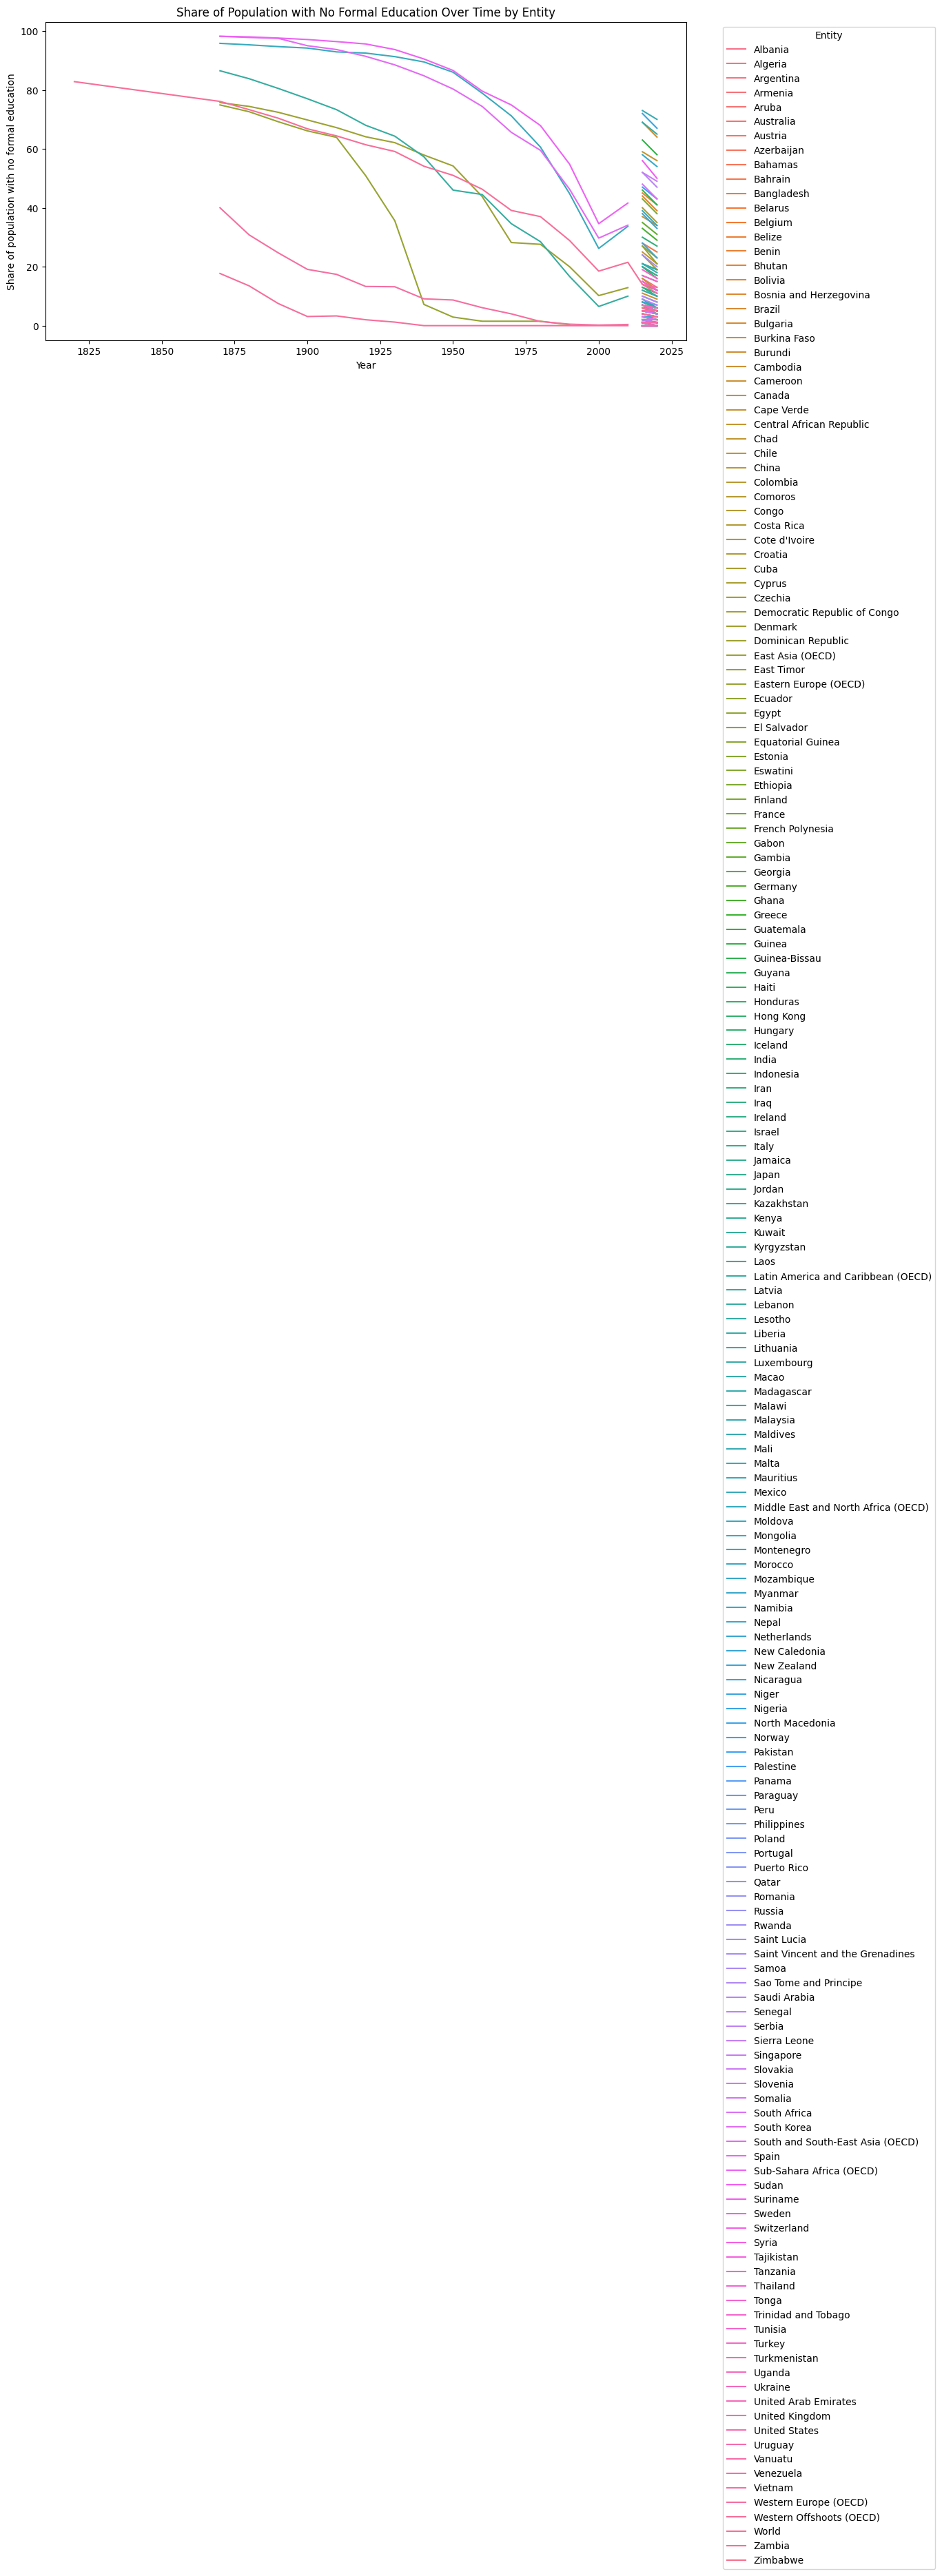

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=least_basic_education_df, x='Year', y='Share of population with no formal education, 1820-2020', hue='Entity')
plt.title('Share of Population with No Formal Education Over Time by Entity')
plt.xlabel('Year')
plt.ylabel('Share of population with no formal education')
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-877012105.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


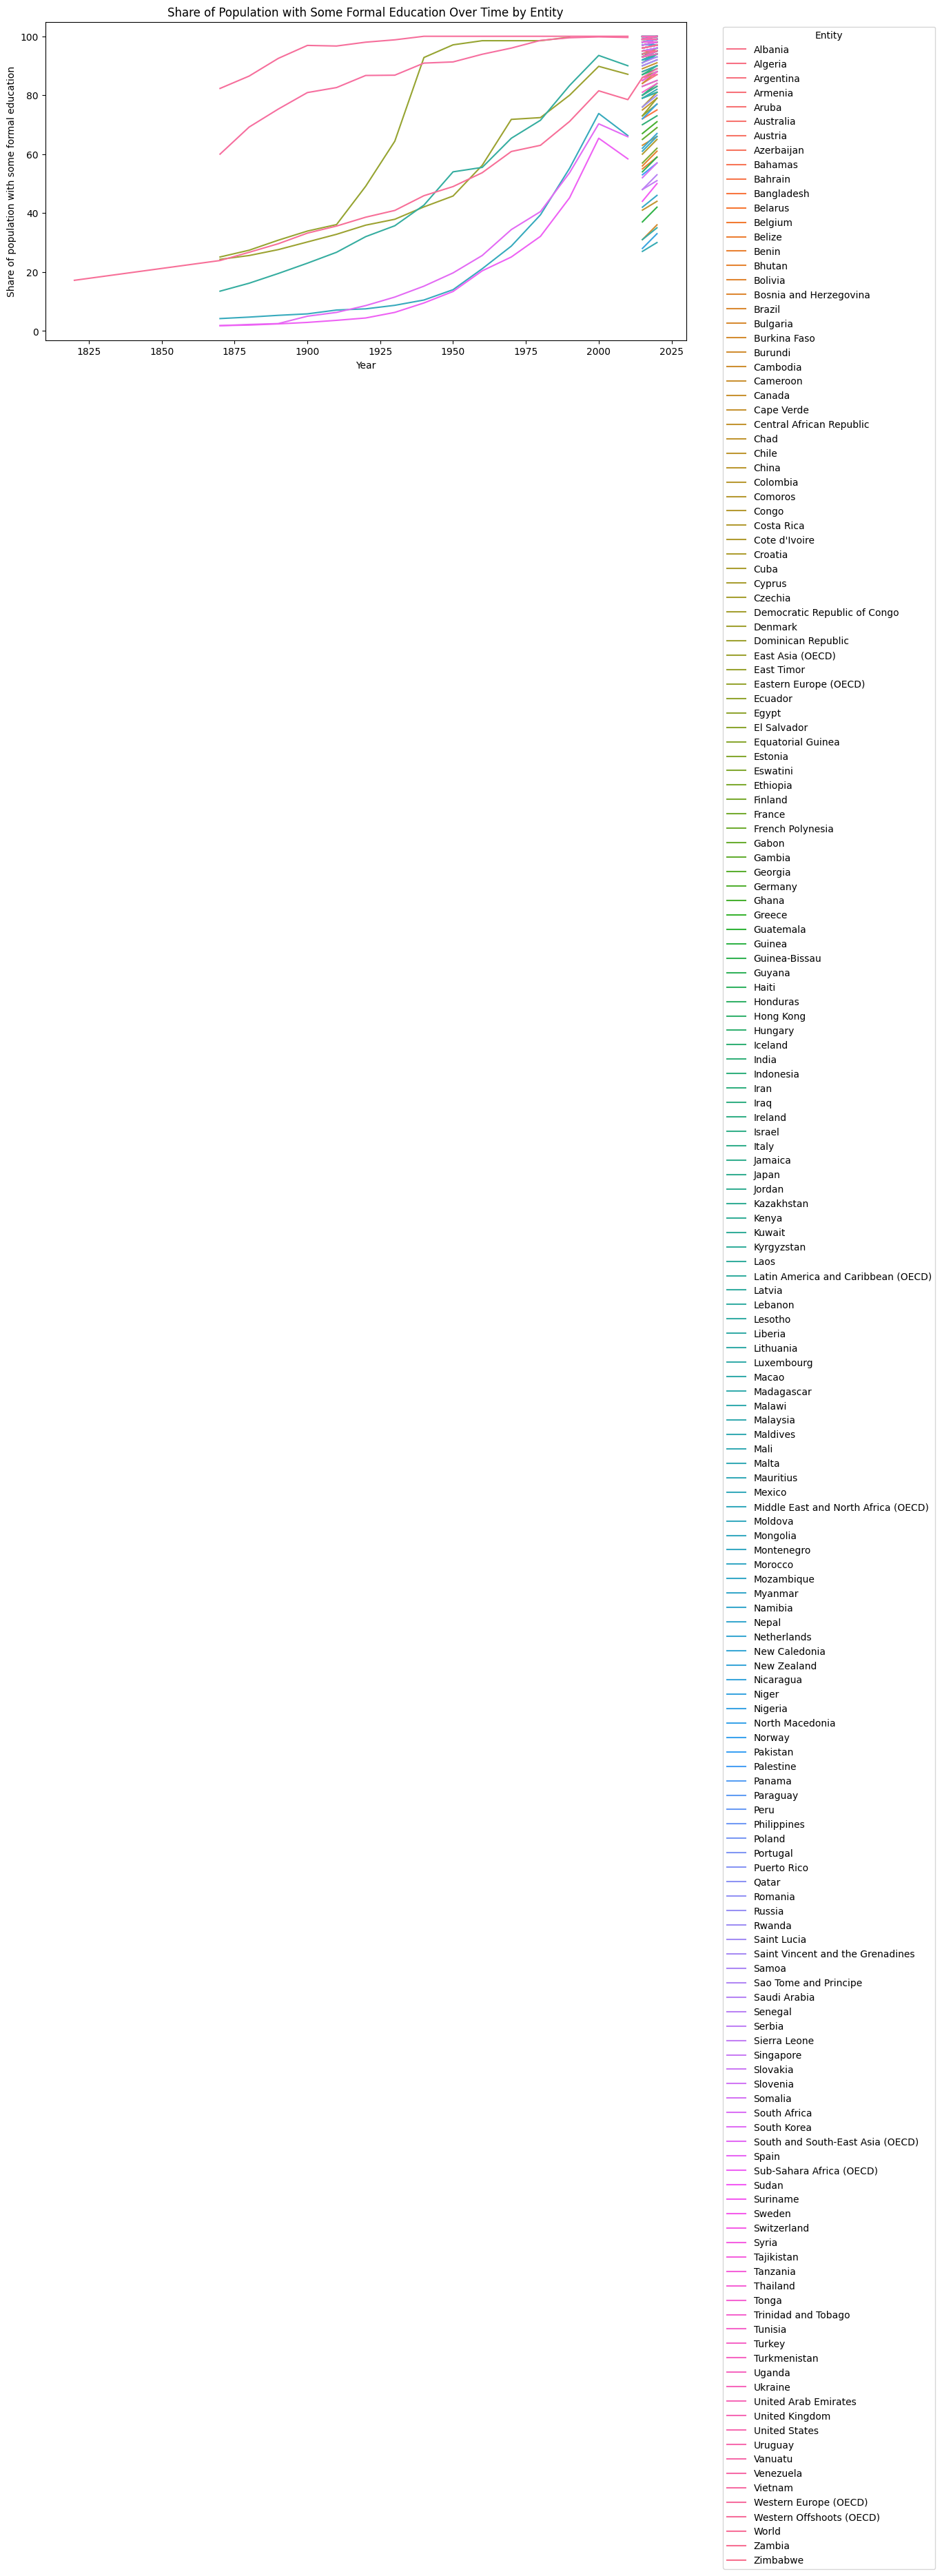

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=least_basic_education_df, x='Year', y='Share of population with some formal education, 1820-2020', hue='Entity')
plt.title('Share of Population with Some Formal Education Over Time by Entity')
plt.xlabel('Year')
plt.ylabel('Share of population with some formal education')
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

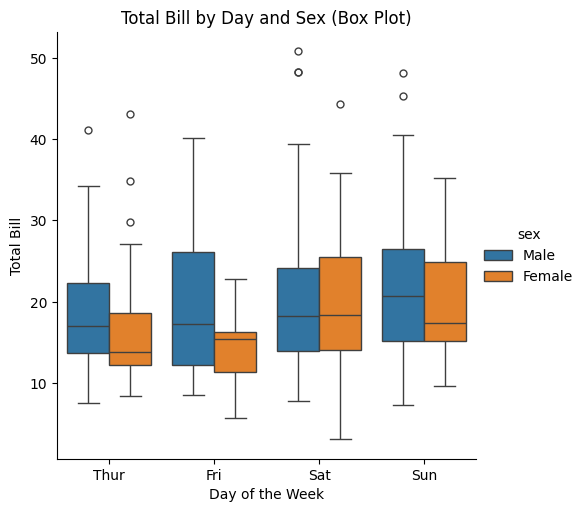

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset("tips")

# Create a catplot
sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")

plt.title("Total Bill by Day and Sex (Box Plot)")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")
plt.show()

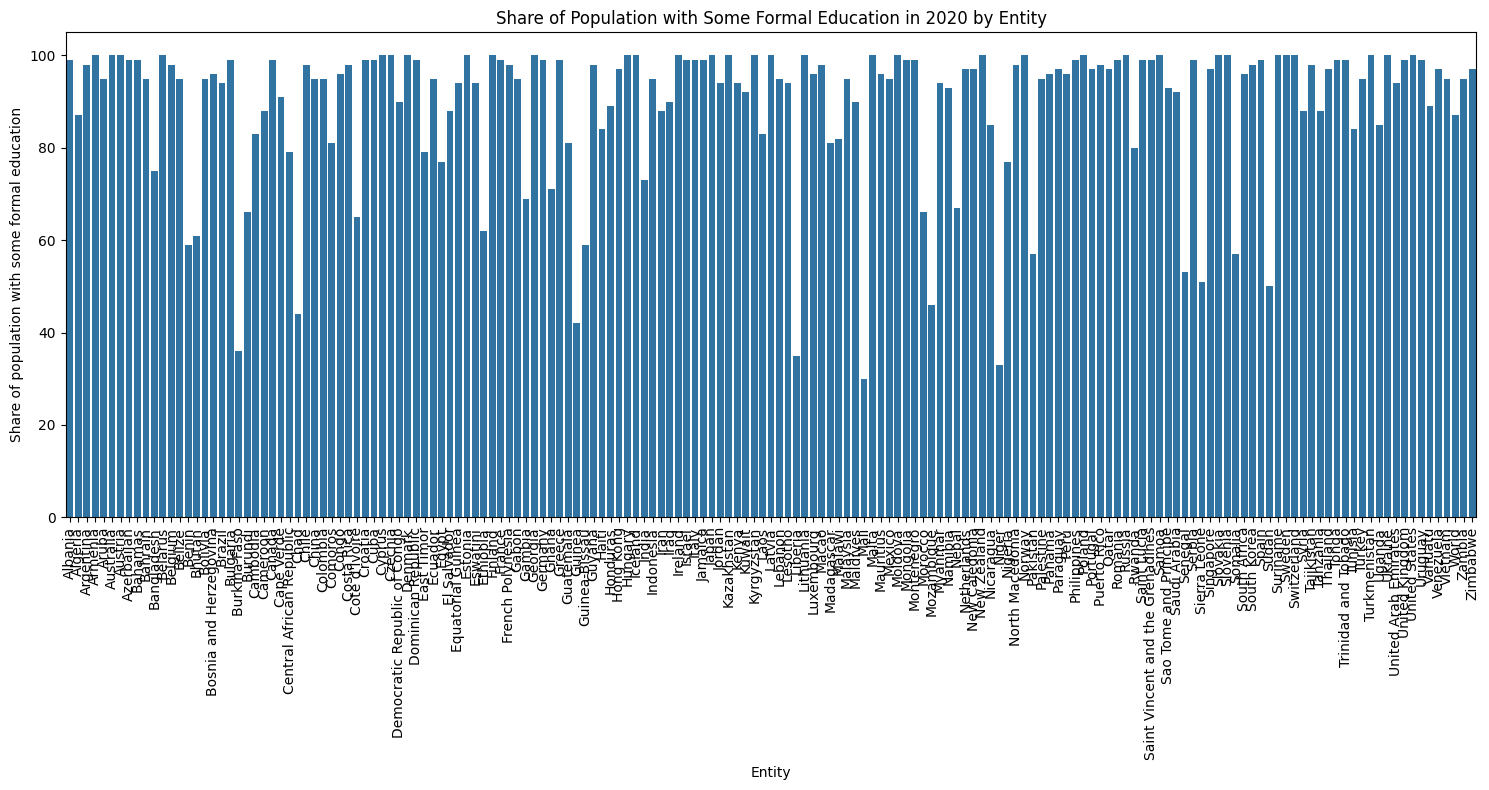

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the year 2020
df_2020 = least_basic_education_df[least_basic_education_df['Year'] == 2020]

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Entity', y='Share of population with some formal education, 1820-2020', data=df_2020)

plt.title('Share of Population with Some Formal Education in 2020 by Entity')
plt.xlabel('Entity')
plt.ylabel('Share of population with some formal education')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

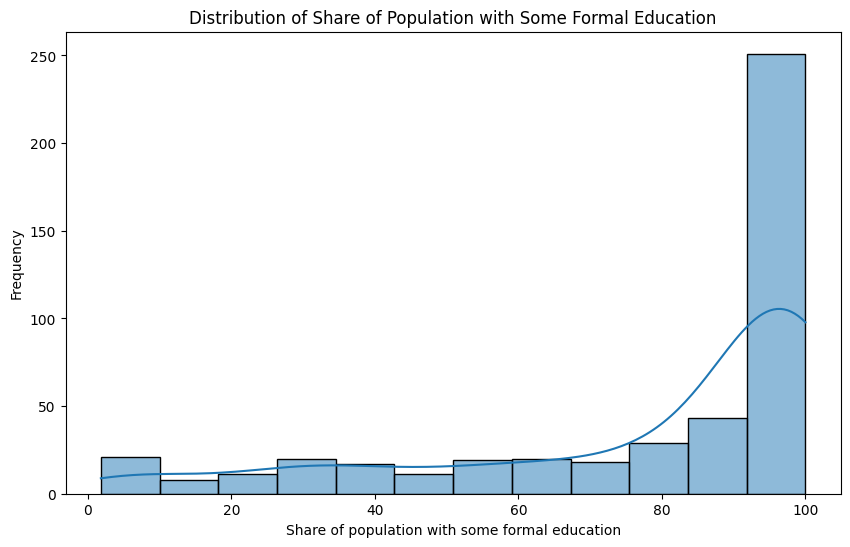

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=least_basic_education_df, x='Share of population with some formal education, 1820-2020', kde=True)
plt.title('Distribution of Share of Population with Some Formal Education')
plt.xlabel('Share of population with some formal education')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=least_basic_education_df, x='Share of population with some no formal education, 1820-2020', kde=True)
plt.title('Distribution of Share of Population with Some No Formal Education')
plt.xlabel('Share of population with some no formal education')
plt.ylabel('Frequency')
plt.show()

ValueError: Could not interpret value `Share of population with some no formal education, 1820-2020` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

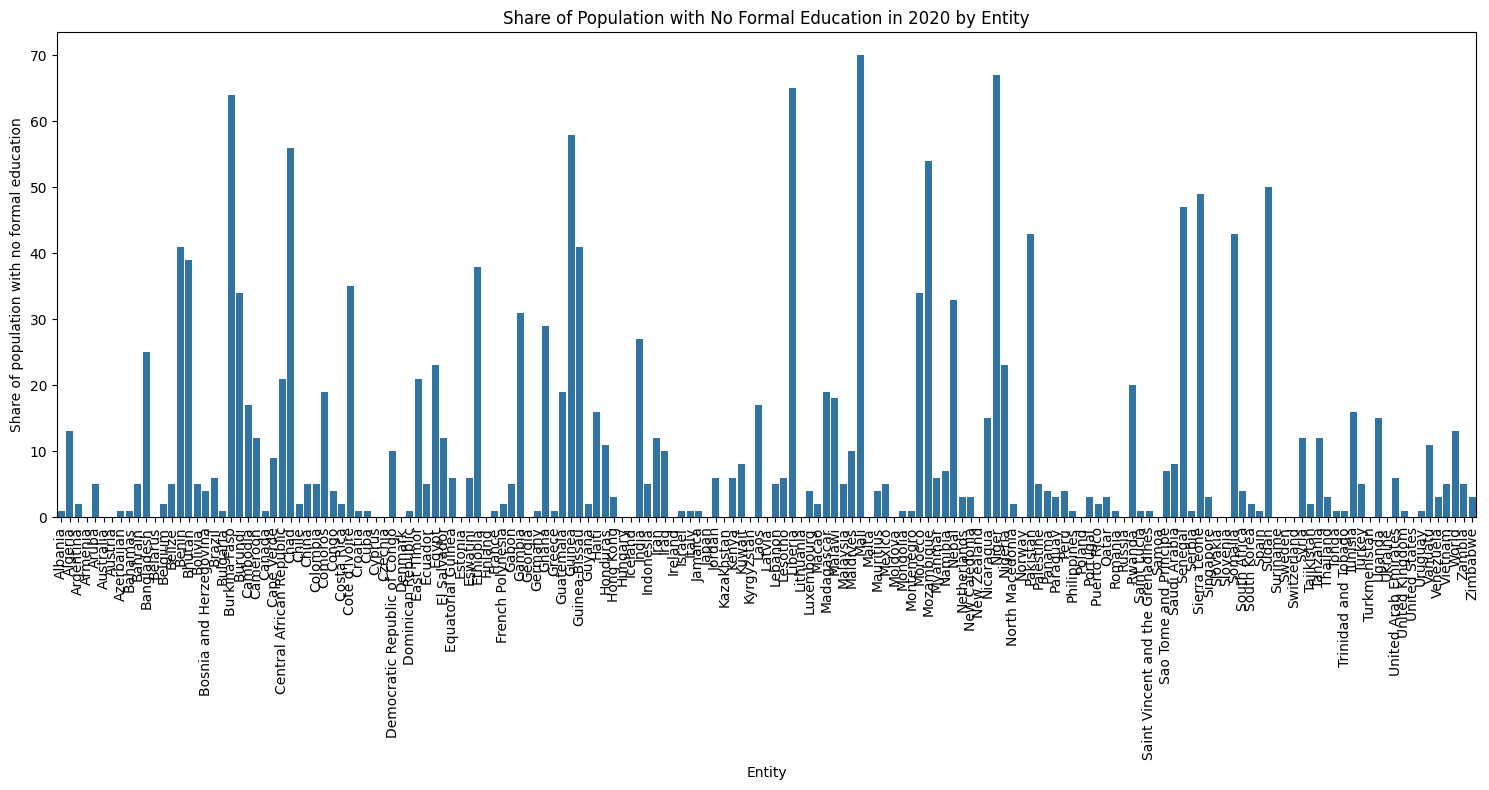

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the year 2020
df_2020 = least_basic_education_df[least_basic_education_df['Year'] == 2020]

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Entity', y='Share of population with no formal education, 1820-2020', data=df_2020)

plt.title('Share of Population with No Formal Education in 2020 by Entity')
plt.xlabel('Entity')
plt.ylabel('Share of population with no formal education')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df_2015 = least_basic_education_df[least_basic_education_df['Year'] == 2015]
display(df_2015.head(40))

,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.000000,98.000000
2,Algeria,DZA,2015,16.000000,84.000000
4,Argentina,ARG,2015,2.000000,98.000000
6,Armenia,ARM,2015,1.000000,99.000000
8,Aruba,ABW,2015,6.000000,94.000000
10,Australia,AUS,2015,1.000000,99.000000
12,Austria,AUT,2015,0.000000,100.000000
14,Azerbaijan,AZE,2015,1.000000,99.000000
16,Bahamas,BHS,2015,1.000000,99.000000
18,Bahrain,BHR,2015,6.000000,94.000000


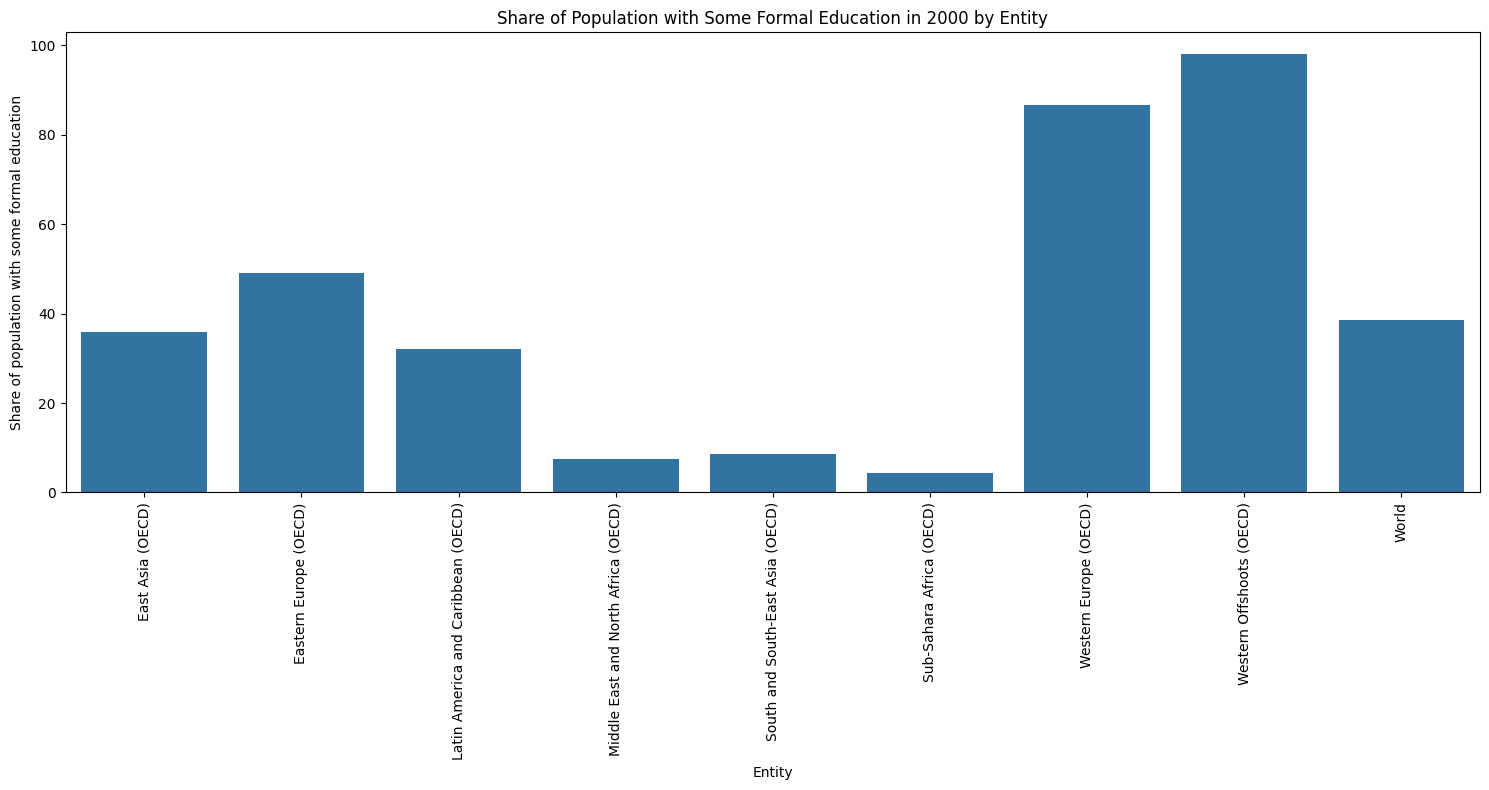

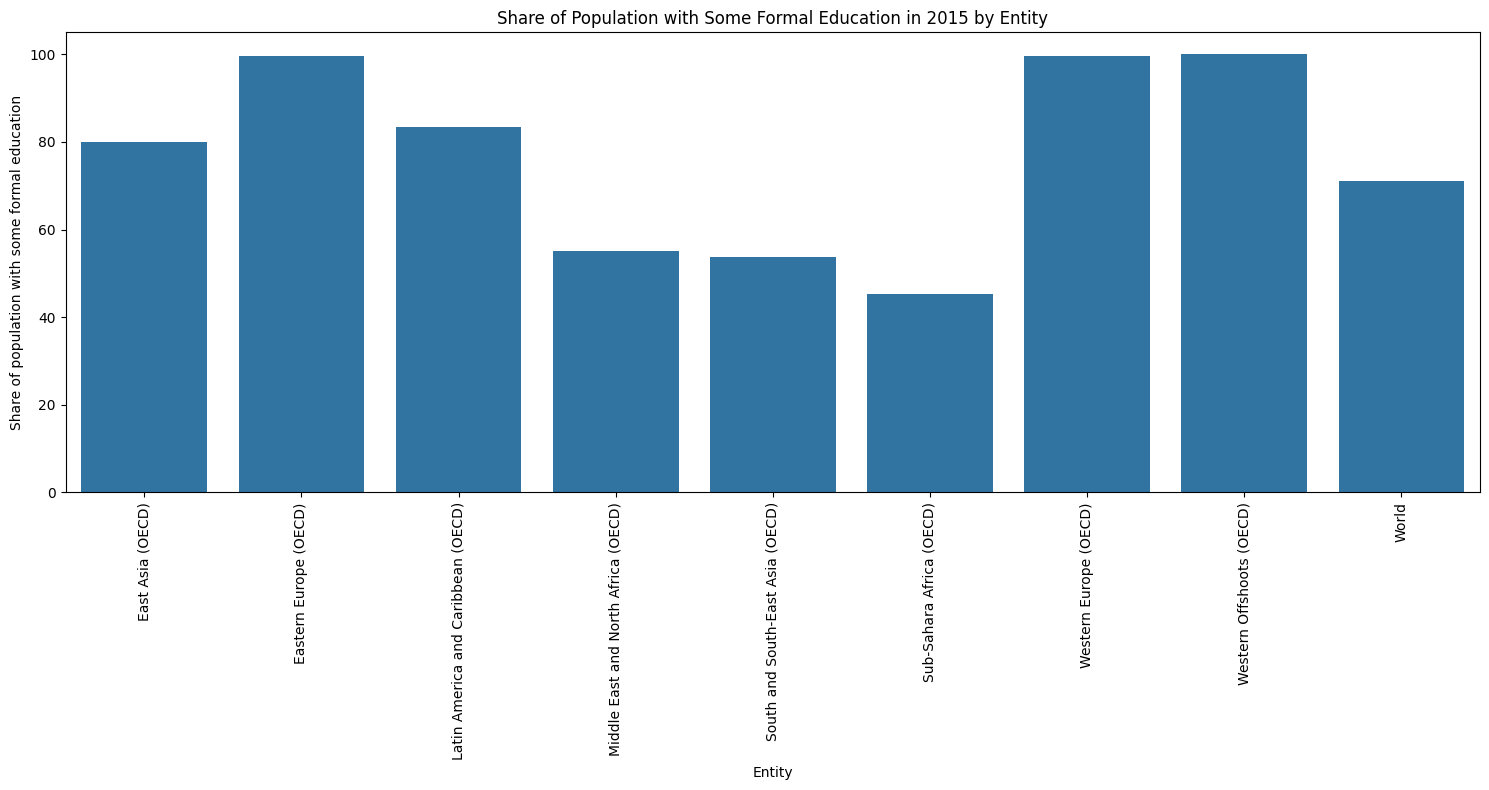

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the year 2000
df_2000 = least_basic_education_df[least_basic_education_df['Year'] == 1920]

# Create a bar plot for Share of population with some formal education in 2000
plt.figure(figsize=(15, 8))
sns.barplot(x='Entity', y='Share of population with some formal education, 1820-2020', data=df_2000)

plt.title('Share of Population with Some Formal Education in 2000 by Entity')
plt.xlabel('Entity')
plt.ylabel('Share of population with some formal education')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Filter the data for the year 2015
df_2015 = least_basic_education_df[least_basic_education_df['Year'] == 1990]

# Create a bar plot for Share of population with some formal education in 2015
plt.figure(figsize=(15, 8))
sns.barplot(x='Entity', y='Share of population with some formal education, 1820-2020', data=df_2015)

plt.title('Share of Population with Some Formal Education in 2015 by Entity')
plt.xlabel('Entity')
plt.ylabel('Share of population with some formal education')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



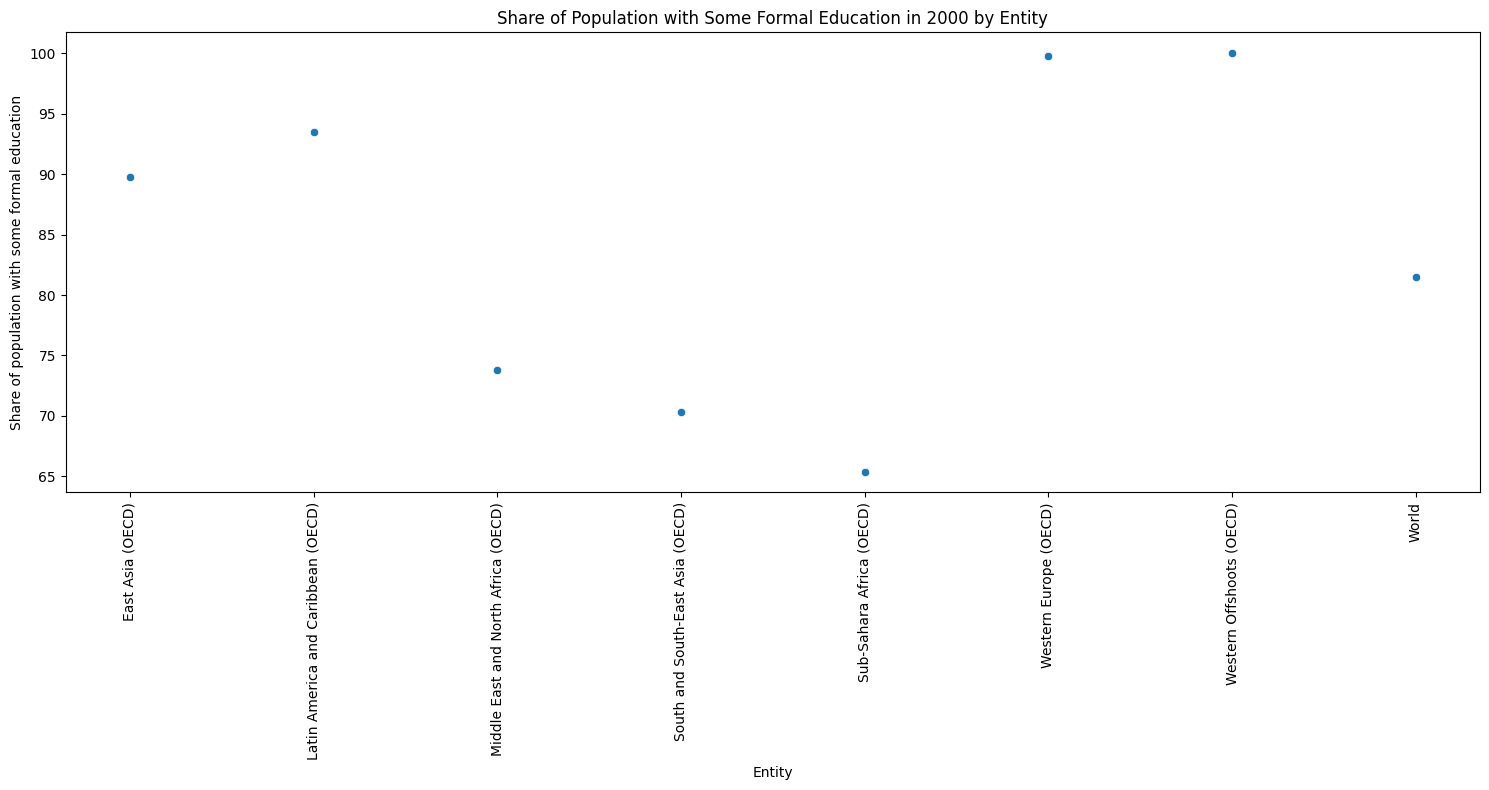

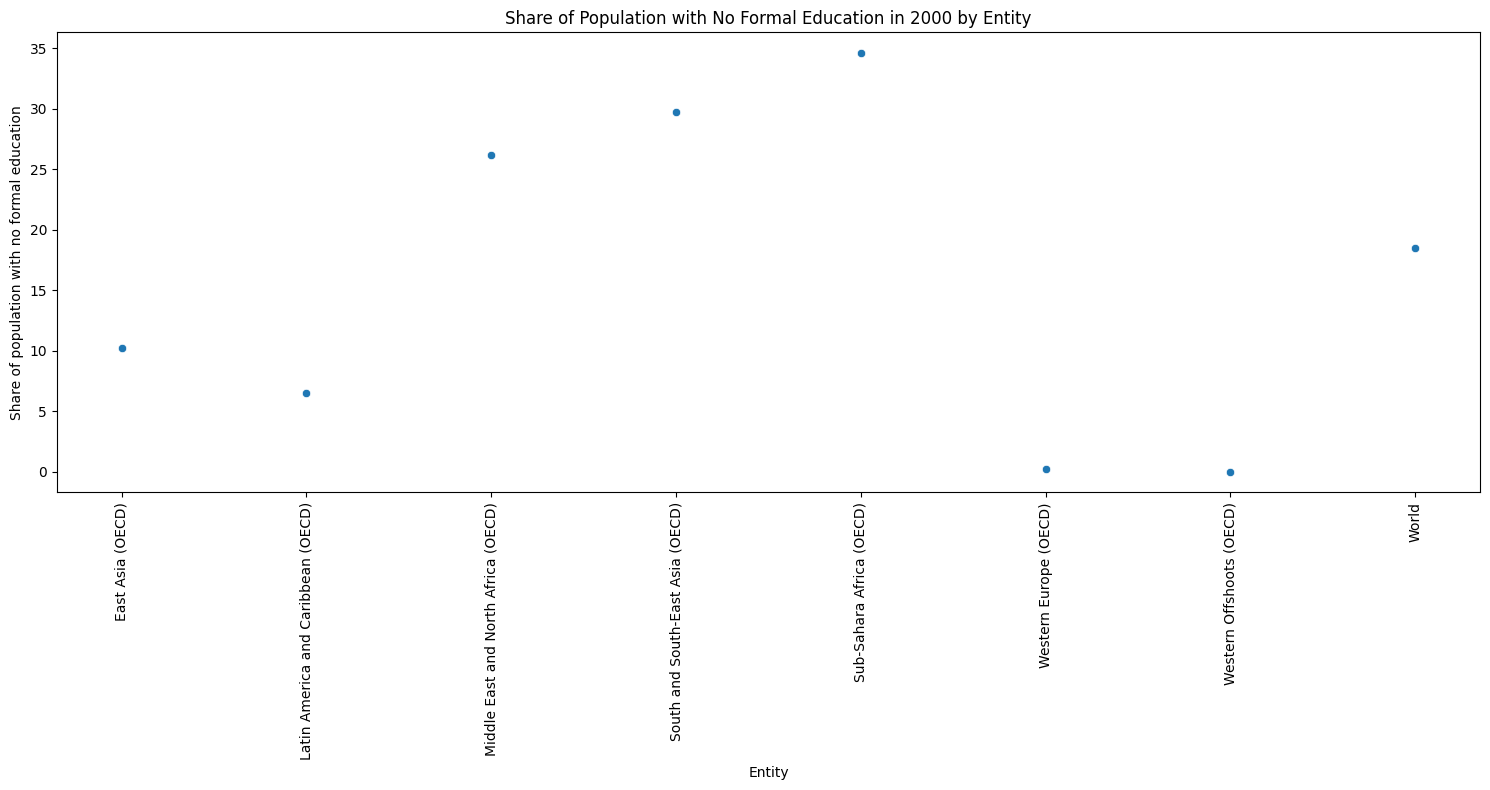

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the year 2000
df_2000 = least_basic_education_df[least_basic_education_df['Year'] == 2000]

# Create a scatter plot for Share of population with some formal education in 2000
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Entity', y='Share of population with some formal education, 1820-2020', data=df_2000)

plt.title('Share of Population with Some Formal Education in 2000 by Entity')
plt.xlabel('Entity')
plt.ylabel('Share of population with some formal education')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Create a scatter plot for Share of population with no formal education in 2000
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Entity', y='Share of population with no formal education, 1820-2020', data=df_2000)

plt.title('Share of Population with No Formal Education in 2000 by Entity')
plt.xlabel('Entity')
plt.ylabel('Share of population with no formal education')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Certainly! You have generated two scatter plots for the year 2000 in cell kVF2xyBcLQKV.

The first scatter plot shows the 'Share of Population with Some Formal Education in 2000 by Entity':

Each point on this plot represents an entity (like a country or region).
The x-axis shows the Entity name.
The y-axis shows the percentage of the population in that entity that had some formal education in the year 2000.
This plot allows you to see the distribution of formal education levels across different entities in 2000 and quickly identify which entities had higher or lower shares of their population with some formal education. For example, you can see that Western Offshoots (OECD) and Western Europe (OECD) had very high shares of population with some formal education in 2000, close to 100%.
The second scatter plot shows the 'Share of Population with No Formal Education in 2000 by Entity':

Similar to the first plot, each point represents an entity.
The x-axis shows the Entity name.
The y-axis shows the percentage of the population in that entity that had no formal education in the year 2000.
This plot shows the opposite trend of the first one. Entities with high shares of formal education will tend to have low shares of no formal education, and vice versa. For instance, Sub-Sahara Africa (OECD) and South and South-East Asia (OECD) had relatively higher shares of population with no formal education in 2000 compared to other regions like Western Offshoots (OECD) which had a share of 0%.
Together, these scatter plots provide a snapshot of the formal education landscape across different entities in the year 2000, highlighting the disparities and variations in educational attainment.

Would you like to compare these 2000 figures with other years, or perhaps focus on specific entities?

Comparing the 'Share of Population with Some Formal Education' across 2000, 2015, and 2020:

2000 Scatter Plot: Shows a range of values across different entities, with some regions like Western Offshoots and Western Europe already having very high shares (near 100%), while others like Sub-Sahara Africa and South and South-East Asia had significantly lower shares (around 65-70%).
2015 Bar Plot: Looking at the same entities or regions, we can observe a general increase in the share of population with some formal education compared to 2000. Regions that had lower shares in 2000 show noticeable improvement. For example, Sub-Sahara Africa's share appears to have increased.
2020 Bar Plot: This plot for the most recent year shows a continuation of the trend from 2015. The shares of population with some formal education have generally increased further across most entities. Many more entities are now closer to the 100% mark compared to both 2000 and 2015.
Comparing the 'Share of Population with No Formal Education' across 2000, 2015, and 2020:

2000 Scatter Plot: Shows a range of values, with some regions having very low shares (near 0%) and others having much higher shares (e.g., Sub-Sahara Africa around 35%, South and South-East Asia around 30%).
2015 Bar Plot: We can see a general decrease in the share of population with no formal education compared to 2000. Regions that had higher shares in 2000 show a decline.
2020 Bar Plot: This plot shows a continued decrease in the share of population with no formal education compared to 2015. Many entities now have shares very close to 0%.
Overall Comparison:

The comparison across these three years (2000, 2015, and 2020) clearly demonstrates a positive global trend in educational attainment. Over these two decades, the share of the population with no formal education has consistently decreased, while the share of the population with some formal education has consistently increased across most entities. This indicates a significant advancement in global education access and participation during this period.

Would you like to focus on the trends for any specific entity or region, or perhaps analyze the magnitude of change between these years?

Certainly! The line chart generated in cell 802xnkWINmgL visualizes the trends in both the 'Share of population with some formal education' and the 'Share of population with no formal education' over time (from 1820 to 2020) for each entity in your dataset.

Here's a breakdown of what the plot shows:

X-axis (Year): Represents time, showing the progression from 1820 to 2020.
Y-axis (Share of Population (%)): Represents the percentage of the population with either some formal education or no formal education.
Color (Hue): Each color represents a different Entity (country or region). Since there are many entities, you see a multitude of lines.
Line Style (Style): The line style distinguishes between the two education types:
Solid lines typically represent one type of education share.
Dashed lines typically represent the other type of education share. (Looking at the legend, the solid lines are 'Share of population with no formal education, 1820-2020' and the dashed lines are 'Share of population with some formal education, 1820-2020').
Interpretation of the Trends:

Share of population with no formal education (Solid Lines): You can observe that for most entities, the solid lines generally trend downwards over time. This indicates a decrease in the percentage of the population with no formal education from 1820 to 2020, which reflects increasing access to and participation in formal education over this period.
Share of population with some formal education (Dashed Lines): Conversely, the dashed lines generally trend upwards over time. This shows an increase in the percentage of the population with some formal education, which is the expected outcome as the share of those with no formal education decreases.
Inverse Relationship: The plot visually reinforces the inverse relationship between the two shares. For any given entity and year, as the solid line goes down, the corresponding dashed line tends to go up.
Variations by Entity: The different colored lines highlight the variations in educational attainment trends across different entities. Some entities started with very high shares of no formal education and have seen dramatic improvements, while others started with relatively lower shares and show more gradual changes.
In essence, this plot provides a comprehensive view of how formal education levels have changed globally across different regions and countries over a long historical period, showing a clear shift towards higher educational attainment.

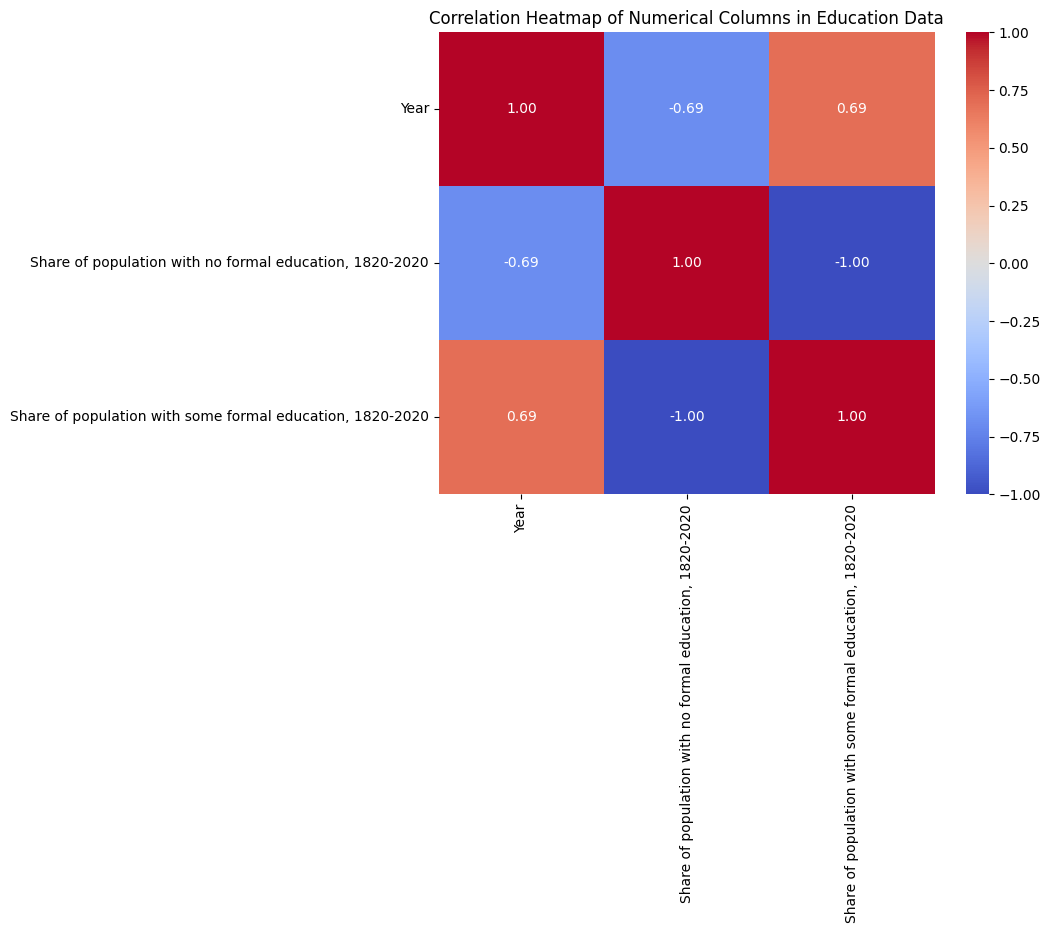

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation
# We can exclude 'Code' and 'Entity' as they are not numerical
numerical_df = least_basic_education_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns in Education Data')
plt.show()

Certainly. The correlation matrix for the numerical columns in your least_basic_education_df DataFrame shows the pairwise linear correlation coefficients between each pair of numerical columns.

You can see the correlation matrix itself in the variable inspector, named correlation_matrix.

Here's what the values mean:

A value of +1 means a perfect positive linear correlation (as one variable increases, the other increases proportionally).
A value of -1 means a perfect negative linear correlation (as one variable increases, the other decreases proportionally).
A value of 0 means no linear correlation.
Values between 0 and +1 indicate a positive linear correlation, with stronger correlations closer to +1.
Values between 0 and -1 indicate a negative linear correlation, with stronger correlations closer to -1.
As we discussed when explaining the heatmap (which is a visual representation of this matrix), the correlation matrix shows:

A strong negative correlation between Year and Share of population with no formal education, 1820-2020.
A strong positive correlation between Year and Share of population with some formal education, 1820-2020.
A perfect negative correlation (-1.00) between Share of population with no formal education, 1820-2020 and Share of population with some formal education, 1820-2020.
This matrix provides the exact numerical values of the linear relationships visualized in the heatmap.

Based on the correlation matrix and heatmap we generated earlier (in cell c7fff98d), the correlation coefficient between 'Year' and 'Share of population with some formal education, 1820-2020' is approximately 0.69.

This indicates a moderately strong positive linear correlation. In simpler terms, as the year increases (moves forward in time), the share of the population with some formal education tends to increase. This aligns with the trend we observed in the line plot for this column.

Based on the correlation matrix and heatmap we generated earlier (in cell c7fff98d), the correlation coefficient between 'Year' and 'Share of population with no formal education, 1820-2020' is approximately -0.69.

This indicates a moderately strong negative linear correlation. In simpler terms, as the year increases (moves forward in time), the share of the population with no formal education tends to decrease. This also aligns with the trend we observed in the line plot for this column.

In [ ]:
# Display the 'Share of population with some formal education, 1820-2020' for the year 2000
print("Share of population with some formal education in 2000:")
display(df_2000[['Entity', 'Share of population with some formal education, 1820-2020']])

# Display the 'Share of population with some formal education, 1820-2020' for the year 2020
print("\nShare of population with some formal education in 2020:")
display(df_2020[['Entity', 'Share of population with some formal education, 1820-2020']])

Share of population with some formal education in 2000:


,Entity,"Share of population with some formal education, 1820-2020"
97,East Asia (OECD),89.8
207,Latin America and Caribbean (OECD),93.5
252,Middle East and North Africa (OECD),73.8
353,South and South-East Asia (OECD),70.3
370,Sub-Sahara Africa (OECD),65.4
429,Western Europe (OECD),99.8
444,Western Offshoots (OECD),100.0
460,World,81.5



Share of population with some formal education in 2020:


,Entity,"Share of population with some formal education, 1820-2020"
1,Albania,99.0
3,Algeria,87.0
5,Argentina,98.0
7,Armenia,100.0
9,Aruba,95.0
...,...,...
413,Venezuela,97.0
415,Vietnam,95.0
463,World,87.0
465,Zambia,95.0
